# Exercise 4.1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib). These libraries can be installed using the ```pip``` command line tool. Alternatively you can install an python distribution like [Anaconda](https://www.continuum.io/downloads) or [Canopy](https://www.enthought.com/products/canopy/)  which have these and many other standard package pre-installed.

In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
from skimage.segmentation import mark_boundaries # mark labels
from sklearn.metrics import roc_curve, auc # roc curve tools
import numpy as np # linear algebra / matrices
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
import os

In [7]:
base_path = '04-files'
seg_path = os.path.join(base_path,'road_image_street_bw.jpg')
rgb_path = os.path.join(base_path,'road_image.jpg')
seg_img = imread(seg_path)
rgb_img = imread(rgb_path)
print('RGB Size',rgb_img.shape,'Seg Size',seg_img.shape)

RGB Size (403, 640, 3) Seg Size (403, 640)


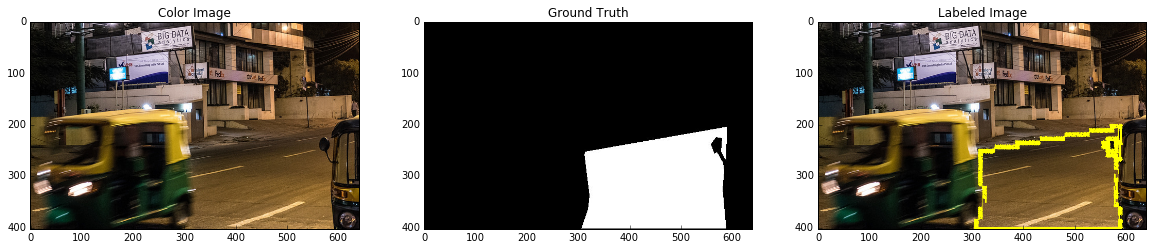

In [14]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (20,5))
ax1.imshow(rgb_img) # show the color image
ax1.set_title("Color Image")
ax2.imshow(seg_img, cmap='gray') # show the segments
ax2.set_title("Ground Truth")
ax3.imshow(mark_boundaries(rgb_img,seg_img))
ax3.set_title("Labeled Image")

## Creating a Simple ROC Curve
We use the score function of taking the mean of the red green and blue channels
$$ I = \frac{R+G+B}{3} $$
We then take the score by normalizing by the maximum value (since the image is 8bit this is 255)
$$ s = \frac{I}{255} $$

In [32]:
ground_truth_labels = seg_img.flatten()>0
score_value = np.mean(rgb_img.astype(np.float32),2).flatten()/255.0
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

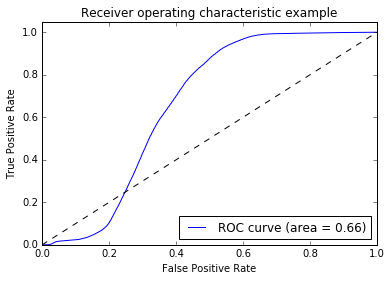

In [30]:
%matplotlib inline
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

## Adding Filters
We can add a filter to this process by importing a ```uniform_filter``` and applying it before processing the image


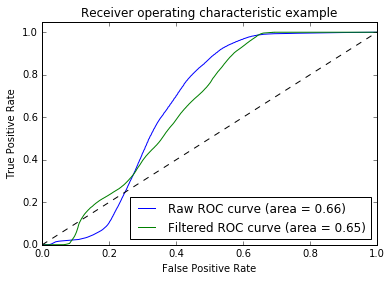

In [38]:
%matplotlib inline
from scipy.ndimage.filters import uniform_filter
filter_size = 45
filtered_image = uniform_filter(np.mean(rgb_img,2),filter_size)
score_value = filtered_image.astype(np.float32).flatten()/255.0
fpr2, tpr2, _ = roc_curve(ground_truth_labels,score_value)
roc_auc2 = auc(fpr2,tpr2)

fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='Raw ROC curve (area = %0.2f)' % roc_auc)
ax.plot(fpr2, tpr2, label='Filtered ROC curve (area = %0.2f)' % roc_auc2)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

### Tasks
1. How can you improve filtering in this analysis? 
 - Which filter elements might improve the area under the ROC?
 - Try making workflows to test out a few different filters
2. Where might morphological operations fit in?
 - How can you make them part of this workflow as well?
3. (Challenge) Try and use the optimize toolbox of _scipy_ with the fmin function (```from scipy.optimize import fmin```) to find the optimum parmeters for the highers area (hint: fmin finds the minimum value)